<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/aml/assesssments/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uq datasets alibi textattack adversarial-robustness-toolbox==1.16.0


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.7/445.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# put the model on a GPU if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# DO NOT CHANGE

def predict(x):
    torch_tensor = torch.from_numpy(x).to(device)
    # we're going to assume the incoming image is shape [1,w,h,c] and convert it to [1,c,w,h]
    torch_tensor = torch.moveaxis(torch_tensor, 3, 1)
    # print(torch_tensor.shape)
    with torch.no_grad():
        output = target_model(torch_tensor)
        output = output.cpu().numpy()
    return output

cuda


In [3]:
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import spacy
from alibi.datasets import load_cats
from alibi.explainers import AnchorImage
from IPython import display
import pandas as pd
from matplotlib import pyplot as plt
from transformers import AutoTokenizer, BertForSequenceClassification
from textattack import Attack, Attacker
from textattack.attack_recipes import DeepWordBugGao2018
from textattack.datasets import Dataset
from alibi.utils import spacy_model


textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:

model = 'en_core_web_md'
spacy_model(model=model)
nlp = spacy.load(model)

tokenizer = AutoTokenizer.from_pretrained("textattack/bert-base-uncased-yelp-polarity")
model = BertForSequenceClassification.from_pretrained("textattack/bert-base-uncased-yelp-polarity")

target_model = torch.hub.load('pytorch/vision:v0.10.0',
                              'mobilenet_v2',
                              weights='MobileNet_V2_Weights.DEFAULT',
                              verbose=False)
target_model.train()
target_model.to(device);

def predict(x):
    torch_tensor = torch.from_numpy(x).to(device)
    # we're going to assume the incoming image is shape [1,w,h,c] and convert it to [1,c,w,h]
    torch_tensor = torch.moveaxis(torch_tensor, 3, 1)
    # print(torch_tensor.shape)
    with torch.no_grad():
        output = target_model(torch_tensor)
        output = output.cpu().numpy()
    return output

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
⚠ As of spaCy v3.0, model symlinks are not supported anymore. You can
load trained pipeline packages using their full names or from a directory
path.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth

  0%|          | 0.00/13.6M [00:00<?, ?B/s]
 28%|██▊       | 3.75M/13.6M [00:00<00:00, 39.0MB/s]
 55%|█████▌    | 7.50M/13.6M [00:00<00:00, 37.7MB/s]
100%|██████████| 13.6M/13.6M [00:00<00:00, 40.6MB/s]


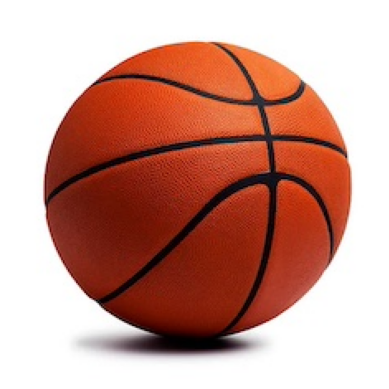

In [7]:
# Define the transforms for preprocessing
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
]);

unnormalize = transforms.Normalize(
   mean= [-m/s for m, s in zip([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])],
   std= [1/s for s in [0.229, 0.224, 0.225]]
)

img = Image.open("basketball.jpg")
img_tensor = preprocess(img).unsqueeze(0)

plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
img = np.moveaxis(unnormalize(img_tensor[0]).numpy(), 0, 2)

explainer = AnchorImage(
    predict,
    image_shape=img.shape,
    segmentation_fn='slic',
    segmentation_kwargs={'n_segments': 30, 'compactness': 50, 'sigma': .1, 'start_label': 0,
                        'channel_axis':-1},
    images_background=None
)

In [9]:
explanation = explainer.explain(img, threshold=.99, p_sample=.5, tau=0.25)

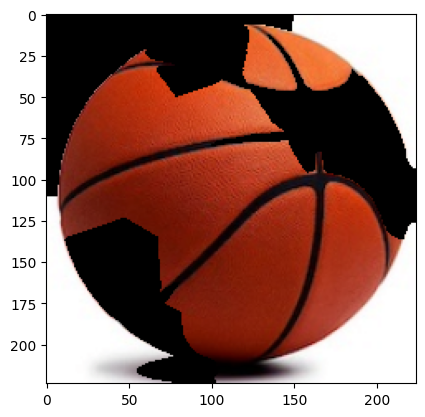

In [10]:
plt.imshow(explanation.anchor)